<a href="https://colab.research.google.com/github/clarajose2001/BlogPosts-API/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Data Collection
# We’ll use the 20 Newsgroups dataset, which is available in sklearn.datasets.


In [1]:
# Install necessary libraries
!pip install scikit-learn gensim nltk

# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Load the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

# Display the first few documents
print(f"Total number of documents: {len(documents)}")
print("\nSample Document:\n", documents[0])


Total number of documents: 18846

Sample Document:
 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [ ]:
#Step 2: Text Preprocessing
#We’ll preprocess the text data by removing stop words, punctuation, and performing tokenization.

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Function to preprocess the documents
def preprocess_text(text):
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove new line characters
    text = re.sub(r"\'", "", text)  # Remove distracting single quotes
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = simple_preprocess(text, deacc=True)  # Tokenization and lowercasing
    return [word for word in text if word not in stop_words]

# Apply preprocessing to all documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Display the first preprocessed document
print("\nPreprocessed Sample Document:\n", preprocessed_documents[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Preprocessed Sample Document:
 ['sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent', 'pens', 'massacre', 'devils', 'actually', 'bit', 'puzzled', 'bit', 'relieved', 'however', 'going', 'put', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pens', 'man', 'killing', 'devils', 'worse', 'thought', 'jagr', 'showed', 'much', 'better', 'regular', 'season', 'stats', 'also', 'lot', 'fo', 'fun', 'watch', 'playoffs', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'games', 'since', 'pens', 'going', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islanders', 'lose', 'final', 'regular', 'season', 'game', 'pens', 'rule']


In [ ]:
#Step 3: Topic Modeling with LDA
#Apply LDA to extract hidden topics.

In [3]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary and corpus for LDA
dictionary = Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualize the topics using pyLDAvis
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


Topic: 0 
Words: 0.009*"armenian" + 0.008*"armenians" + 0.007*"turkish" + 0.007*"war" + 0.005*"jews" + 0.005*"turkey" + 0.004*"russian" + 0.004*"university" + 0.004*"greek" + 0.004*"turks"

Topic: 1 
Words: 0.024*"drive" + 0.013*"new" + 0.012*"scsi" + 0.010*"car" + 0.009*"sale" + 0.009*"disk" + 0.008*"drives" + 0.008*"hard" + 0.007*"price" + 0.007*"controller"

Topic: 2 
Words: 0.015*"game" + 0.012*"team" + 0.010*"games" + 0.009*"year" + 0.007*"season" + 0.007*"play" + 0.007*"hockey" + 0.006*"players" + 0.006*"league" + 0.005*"db"

Topic: 3 
Words: 0.008*"mr" + 0.008*"president" + 0.007*"health" + 0.006*"medical" + 0.005*"stephanopoulos" + 0.005*"drug" + 0.004*"ms" + 0.004*"use" + 0.004*"number" + 0.004*"states"

Topic: 4 
Words: 0.010*"would" + 0.009*"thanks" + 0.009*"one" + 0.008*"please" + 0.008*"anyone" + 0.008*"know" + 0.007*"use" + 0.007*"like" + 0.006*"im" + 0.006*"card"

Topic: 5 
Words: 0.558*"ax" + 0.041*"max" + 0.006*"pl" + 0.004*"wm" + 0.003*"giz" + 0.003*"bhj" + 0.003*"cx"

In [ ]:
#Step 4: Word Embeddings
#Generate word embeddings using a pre-trained Glove model.

In [8]:
# Install necessary libraries
!pip install gensim
!pip install wget

from gensim.models import KeyedVectors
import numpy as np
import wget
import zipfile
import os

# Download GloVe word vectors
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_path = wget.download(glove_url)

# Unzip the GloVe file
with zipfile.ZipFile(glove_path, 'r') as zip_ref:
    zip_ref.extractall("glove")

# Path to the GloVe 300-dimensional vectors file
glove_file = 'glove/glove.6B.300d.txt'

# Load GloVe vectors using gensim
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# Function to compute average GloVe embeddings for each document
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in glove_model.key_to_index]
    if len(doc) == 0:  # To avoid division by zero if no word is found in the vocabulary
        return np.zeros(300)
    return np.mean(glove_model[doc], axis=0)

# Compute document vectors
doc_vectors = np.array([document_vector(doc) for doc in preprocessed_documents])

# Display the shape of document vectors
print("\nShape of Document Vectors:", doc_vectors.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5aed3d20398decc672b0a273330f85048f7f1b3171e9d7feb3ee6641e773f96b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

Shape of Document Vectors: (18846, 300)


In [ ]:
#Document Similarity and Clustering


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cosine Similarity Matrix Shape: (18846, 18846)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


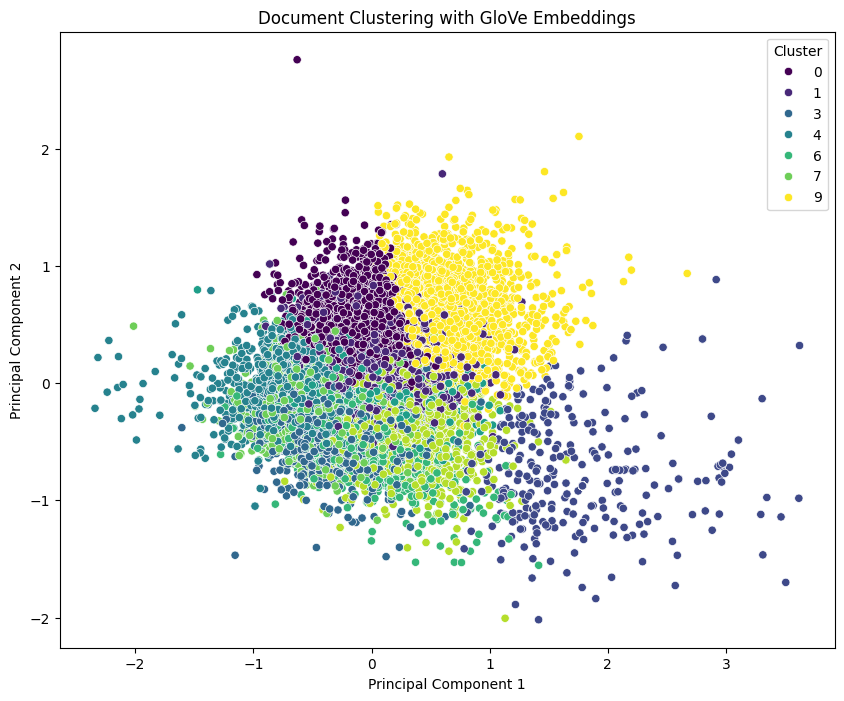

In [9]:
# Install necessary libraries
!pip install scikit-learn matplotlib seaborn

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(doc_vectors)

# Print the shape of the cosine similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim_matrix.shape)

# Cluster the documents using KMeans
num_clusters = 10  # You can choose the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(doc_vectors)
clusters = kmeans.labels_

# Reduce dimensionality for visualization using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(doc_vectors)

# Visualize the clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_vecs[:, 0], y=reduced_vecs[:, 1], hue=clusters, palette='viridis')
plt.title("Document Clustering with GloVe Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='best')
plt.show()


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming `corpus` is the list of documents in the bag-of-words format used with LDA
# and `lda_model` is the trained LDA model.

# 1. Compute LDA topic distributions for each document in dense format
lda_topic_distributions = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# Convert sparse topic distributions to a dense matrix
num_topics = lda_model.num_topics
lda_dense_distributions = np.zeros((len(corpus), num_topics))

for i, doc in enumerate(lda_topic_distributions):
    for topic_num, prob in doc:
        lda_dense_distributions[i, topic_num] = prob

# 2. Cluster documents using LDA-based similarity
lda_kmeans = KMeans(n_clusters=num_clusters, random_state=42)
lda_kmeans.fit(lda_dense_distributions)
lda_clusters = lda_kmeans.labels_

# 3. Cluster documents using GloVe-based similarity
glove_kmeans = KMeans(n_clusters=num_clusters, random_state=42)
glove_kmeans.fit(doc_vectors)
glove_clusters = glove_kmeans.labels_

# 4. Calculate Adjusted Rand Index (ARI) for cluster comparison
ari_score = adjusted_rand_score(lda_clusters, glove_clusters)
print(f"Adjusted Rand Index between LDA and GloVe clusters: {ari_score:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index between LDA and GloVe clusters: 0.22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


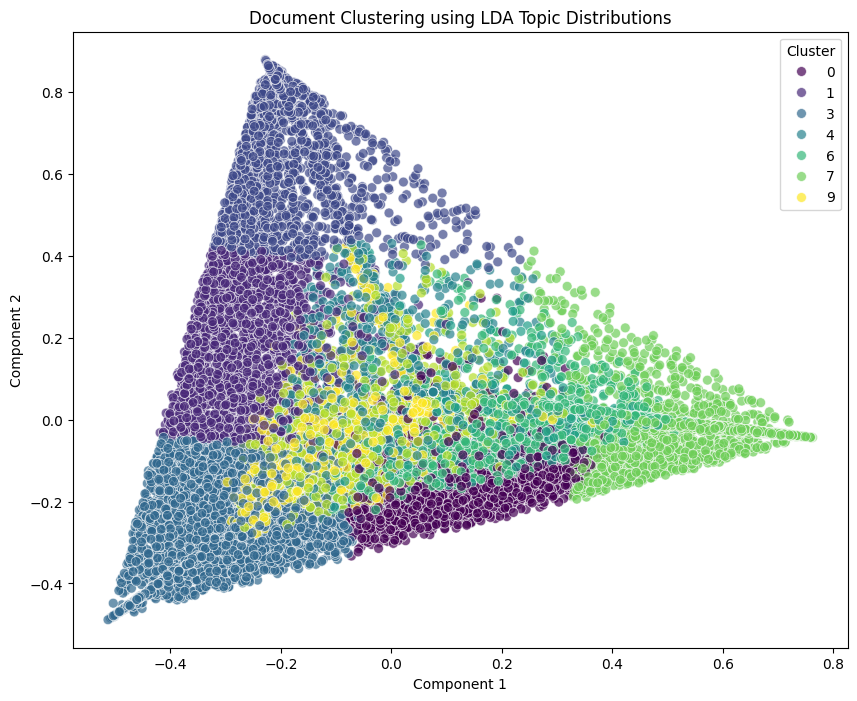

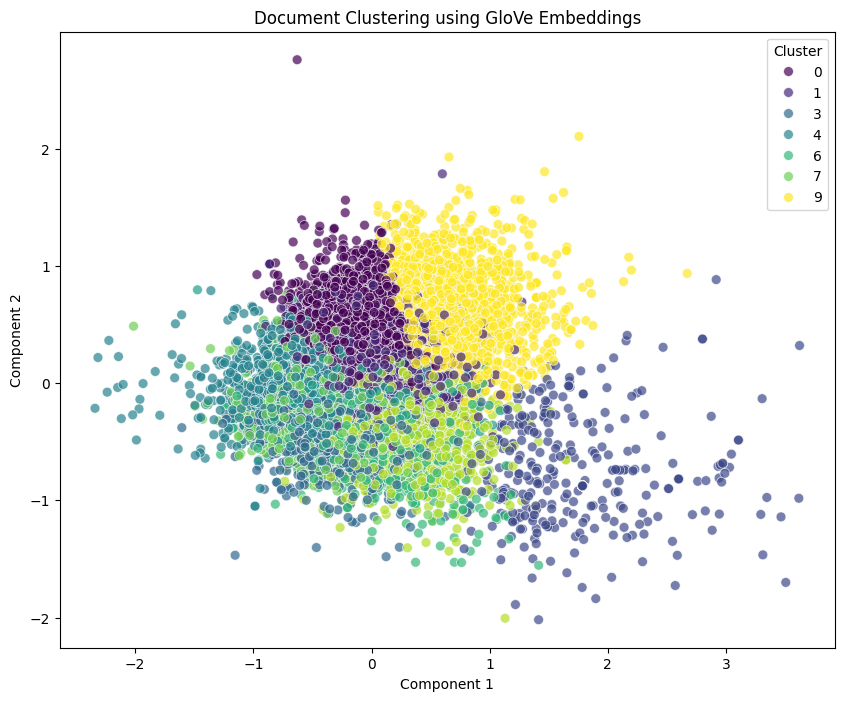

In [14]:
# Install necessary libraries if not already installed
!pip install matplotlib seaborn scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Choose dimensionality reduction method (PCA or t-SNE)
use_pca = True  # Change to False to use t-SNE

# Function to visualize clusters
def plot_clusters(vectors, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=vectors[:, 0], y=vectors[:, 1], hue=labels, palette='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster", loc='best')
    plt.show()

# Dimensionality reduction for LDA-based vectors
if use_pca:
    pca = PCA(n_components=2)
    lda_reduced = pca.fit_transform(lda_dense_distributions)
else:
    tsne = TSNE(n_components=2, random_state=42)
    lda_reduced = tsne.fit_transform(lda_dense_distributions)

# Visualize LDA-based clusters
plot_clusters(lda_reduced, lda_clusters, "Document Clustering using LDA Topic Distributions")

# Dimensionality reduction for GloVe-based vectors
if use_pca:
    glove_reduced = pca.fit_transform(doc_vectors)
else:
    glove_reduced = tsne.fit_transform(doc_vectors)

# Visualize GloVe-based clusters
plot_clusters(glove_reduced, glove_clusters, "Document Clustering using GloVe Embeddings")
